In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [2]:
#Load the dataset
url="telco.csv"
df=pd.read_csv(url)
# Quick summary of the dataset
print("Dataset Shape:", df.shape)
print(df.info())

Dataset Shape: (7043, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract        

In [3]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
# View first few rows
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,Stayed
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned


In [5]:
#Encode categorical Variables
label_cols=["gender","Partner","Dependents","PhoneService","PaperlessBilling","Churn"]
for col in label_cols:
    df[col]=LabelEncoder().fit_transform(df[col])

df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.drop(["customerID"],axis=1,inplace=True)

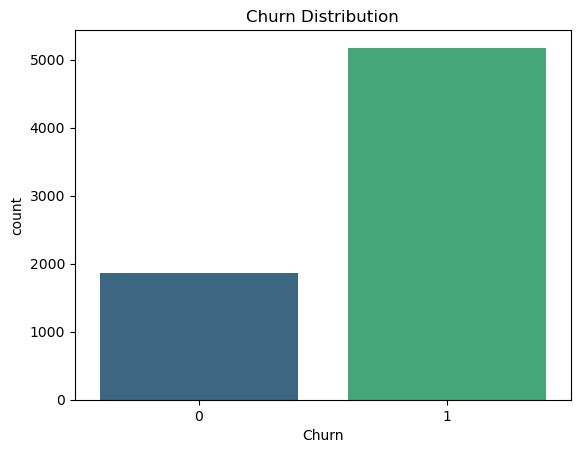

In [6]:
#visualizing the churn distribution
sns.countplot(x='Churn',data=df,palette='viridis')
plt.title('Churn Distribution')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


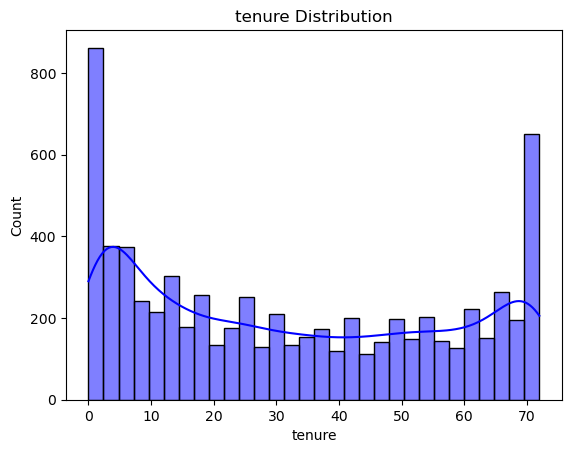

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


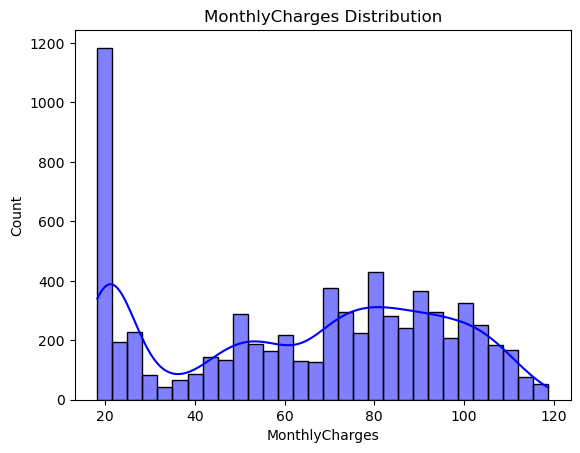

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


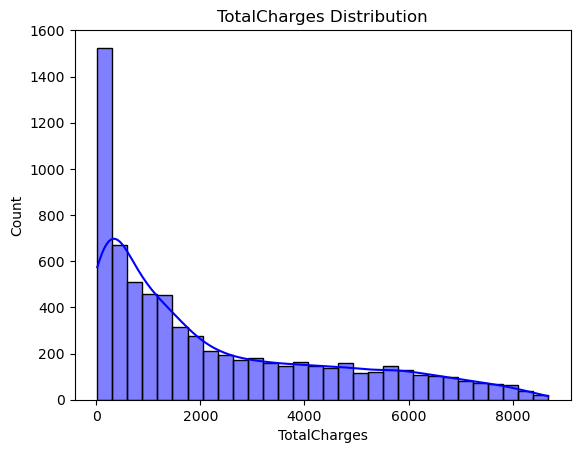

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

#visualize numerical feature distribution
numerical_features=["tenure","MonthlyCharges","TotalCharges"]
for feature in numerical_features:
    sns.histplot(df[feature],kde=True,bins=30,color='blue')
    plt.title(f'{feature} Distribution')
    plt.show()

In [8]:
#Encoding Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

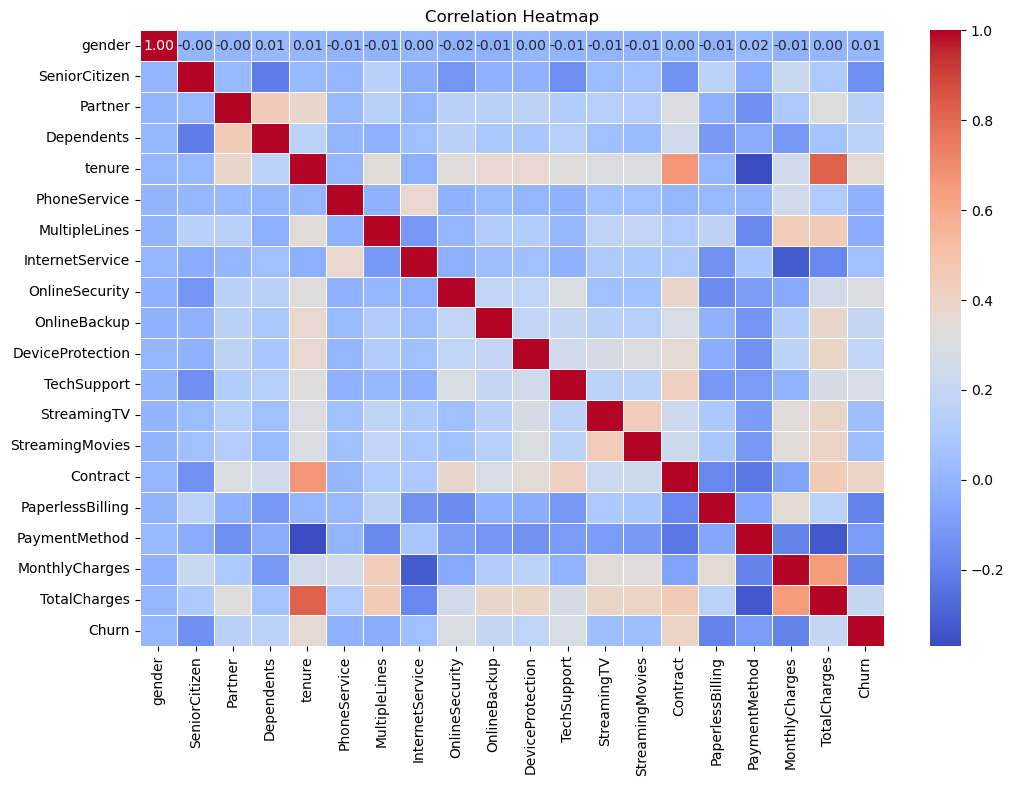

In [9]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
#Split features and target variable
X=df.drop("Churn",axis=1)
Y=df["Churn"]

In [11]:
# Define an imputer for numerical data
numerical_imputer = SimpleImputer(strategy='mean')
# Apply imputation to numerical columns
X = df.drop('Churn', axis=1)
X = numerical_imputer.fit_transform(X)

# Use SMOTE after imputation
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

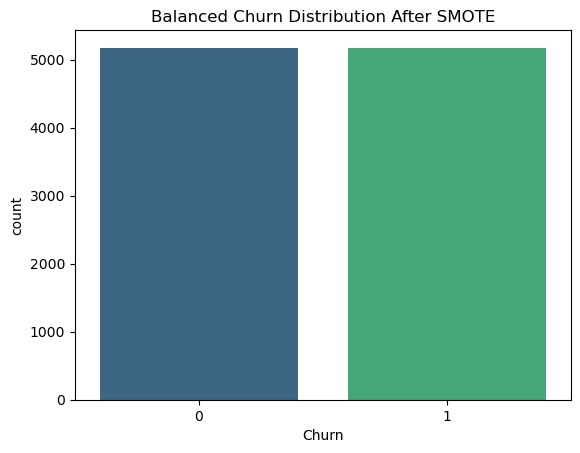

In [12]:
#Visualize new class distribution
sns.countplot(x=Y_resampled,palette='viridis')
plt.title('Balanced Churn Distribution After SMOTE')
plt.show()

In [13]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

In [14]:
# Define Random Forest and parameter grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid Search CV for best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}


In [15]:
#Predictions and metrics 
y_pred=best_model.predict(X_test)
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      1531
           1       0.85      0.90      0.87      1574

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



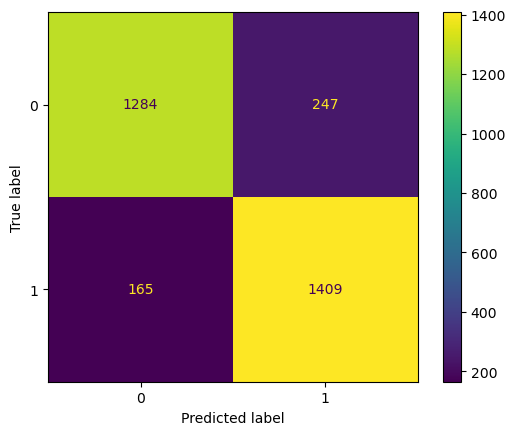

In [16]:
#Confusion Matrix 
conf_matrix=confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=[0,1])
cm_display.plot()
plt.show()

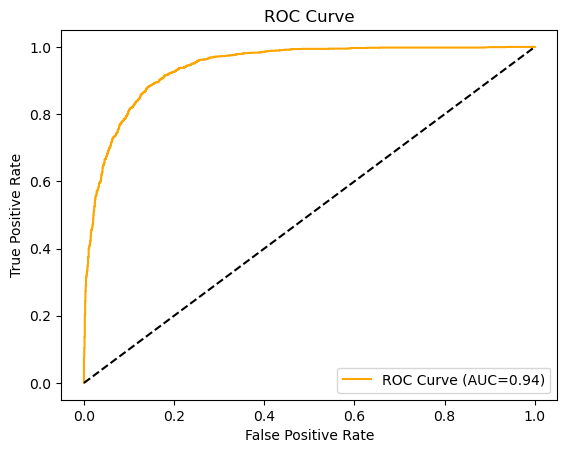

In [17]:
#ROC Curve and AUC 
y_proba=best_model.predict_proba(X_test)[:,1]
fpr,tpr,_ = roc_curve(y_test,y_proba)
auc_score=roc_auc_score(y_test,y_proba)

plt.plot(fpr,tpr,label= f'ROC Curve (AUC={auc_score:.2f})',color='orange')
plt.plot([0,1],[0,1],linestyle='--',color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [18]:
#Overall Accuracy 
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{accuracy:.2f}")

Model Accuracy:0.87


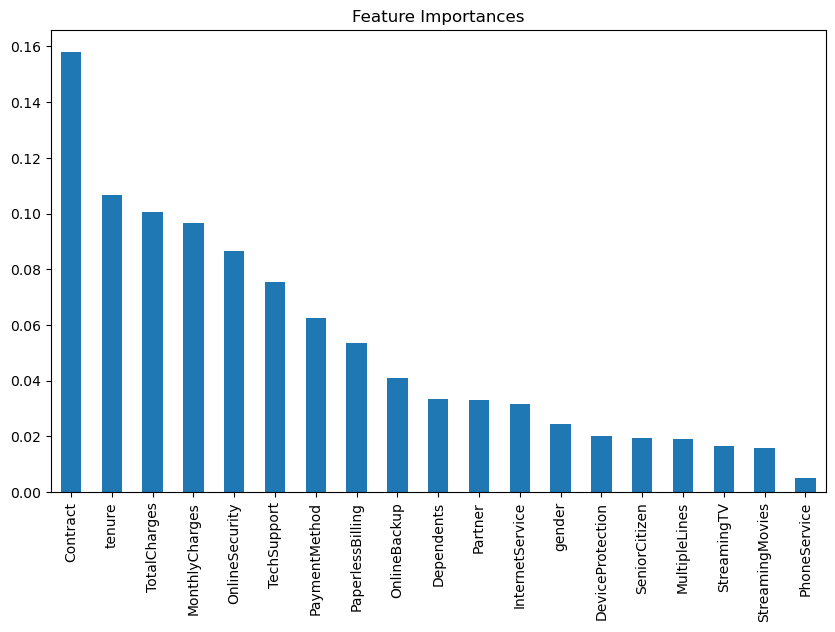

In [19]:
X = pd.DataFrame(X, columns=df.drop('Churn', axis=1).columns)
#Plot feature importance 
importances=pd.Series(best_model.feature_importances_,index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar',figsize=(10,6),title="Feature Importances")
plt.show()